###Binary Classificaion for classifying Pizza and Steak

In [1]:
#get dataset programmingly
import zipfile

#get the file and download this file
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#unzip te download file
zip_ref = zipfile.ZipFile("pizza_steak.zip")

zip_ref.extractall()
zip_ref.close()

--2024-02-04 15:11:41--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.127.207, 172.217.218.207, 142.251.31.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.127.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  32.3MB/s    in 3.2s    

2024-02-04 15:11:45 (32.3 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [2]:
#walk through the directory of dataset
import os
for directory_name,file,images in os.walk("/content/pizza_steak"):
  print(f"There are {len(images)} images in directory {directory_name}")

There are 0 images in directory /content/pizza_steak
There are 0 images in directory /content/pizza_steak/train
There are 750 images in directory /content/pizza_steak/train/steak
There are 750 images in directory /content/pizza_steak/train/pizza
There are 0 images in directory /content/pizza_steak/test
There are 250 images in directory /content/pizza_steak/test/steak
There are 250 images in directory /content/pizza_steak/test/pizza


In [3]:
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

In [4]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

### Let's view random images in train and test directory


In [39]:
class_names=['pizza','steak']
class_names

['pizza', 'steak']

In [6]:
import random
import matplotlib.pyplot as plt

def view_random_image(directory,class_name):
  random_images=os.listdir(f"{directory}/{class_name}")
  randomIndex=random.randrange(len(random_images))
  image=plt.imread(f"{train_dir}/{class_name}/{random_images[randomIndex]}")
  plt.imshow(image)
  plt.axis(False)

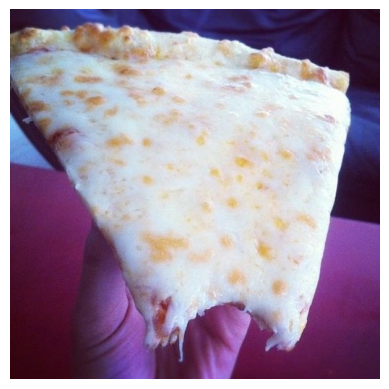

In [38]:
view_random_image(train_dir,"pizza")

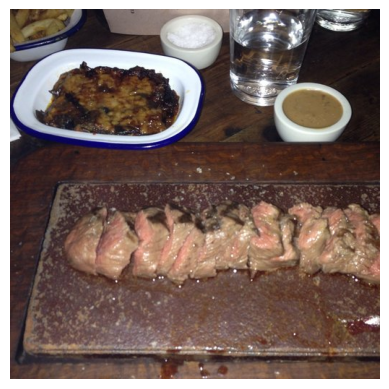

In [8]:
view_random_image(train_dir,"steak")

### Preprocessing train and test data


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
train_data_gen = ImageDataGenerator(
    rescale=(1/255)
)
test_data_gen = ImageDataGenerator(
    rescale=(1/255)
)


In [11]:
train_data = train_data_gen.flow_from_directory(
    directory = train_dir,
    target_size = (244,244),
    class_mode = "binary",
    batch_size = 32,
    shuffle = True
)

test_data = test_data_gen.flow_from_directory(
    directory = test_dir,
    target_size = (244,244),
    batch_size = 32,
    shuffle = True,
    class_mode = "binary"
)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


### Create an ideal CNN Model



In [12]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPool2D
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

In [13]:
#create model with 3 layers
model_1 = Sequential([
    Conv2D(
        filters = 10,
        kernel_size = 3,
        input_shape = (244,244,3),
        activation="relu"),
    Conv2D(
        filters = 10,
        kernel_size = 3,
        input_shape = (244,244,3),
        activation = "relu",
    ),
    Conv2D(
        filters = 10,
        kernel_size = 3,
        input_shape = (244,244,3),
        activation = "relu"
    ),
    Flatten(),
    Dense(1,activation="sigmoid")
])

#compile the model
model_1.compile(
    loss=BinaryCrossentropy(),
    optimizer=Adam(),
    metrics=['accuracy']
)

#fit the data into model
history_1 = model_1.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data)
)



Epoch 1/5
47/47 [==============================] - 20s 299ms/step - loss: 0.6993 - accuracy: 0.6993 - val_loss: 0.4590 - val_accuracy: 0.7820
Epoch 2/5
47/47 [==============================] - 10s 214ms/step - loss: 0.4340 - accuracy: 0.8140 - val_loss: 0.4005 - val_accuracy: 0.8300
Epoch 3/5
47/47 [==============================] - 8s 160ms/step - loss: 0.2618 - accuracy: 0.9000 - val_loss: 0.4329 - val_accuracy: 0.8060
Epoch 4/5
47/47 [==============================] - 6s 130ms/step - loss: 0.1019 - accuracy: 0.9747 - val_loss: 0.4073 - val_accuracy: 0.8260
Epoch 5/5
47/47 [==============================] - 6s 131ms/step - loss: 0.0304 - accuracy: 0.9953 - val_loss: 0.5566 - val_accuracy: 0.7780


In [14]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 242, 242, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 240, 240, 10)      910       
                                                                 
 conv2d_2 (Conv2D)           (None, 238, 238, 10)      910       
                                                                 
 flatten (Flatten)           (None, 566440)            0         
                                                                 
 dense (Dense)               (None, 1)                 566441    
                                                                 
Total params: 568541 (2.17 MB)
Trainable params: 568541 (2.17 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


<Axes: >

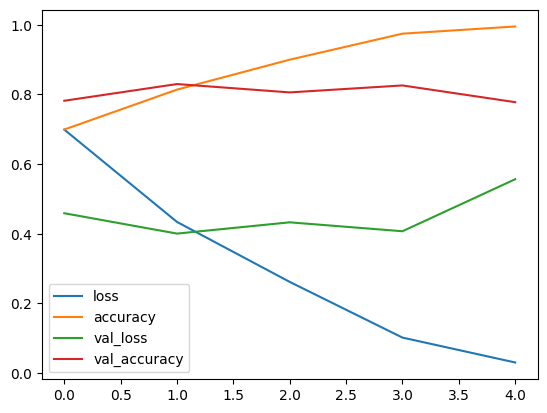

In [15]:
import pandas as pd
pd.DataFrame(history_1.history).plot()

In [16]:
def plot_loss_curve(history):

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs=range(len(history.history['loss']))
  plt.plot(epochs,loss,label="loss")
  plt.plot(epochs,val_loss,label="validation loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  plt.figure()
  plt.plot(epochs,accuracy,label="accuracy")
  plt.plot(epochs,val_accuracy,label="validation accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

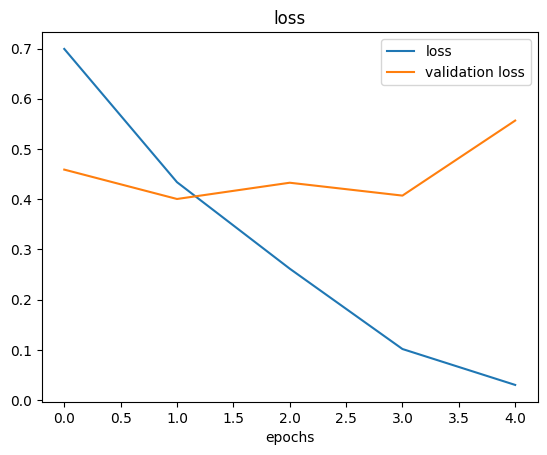

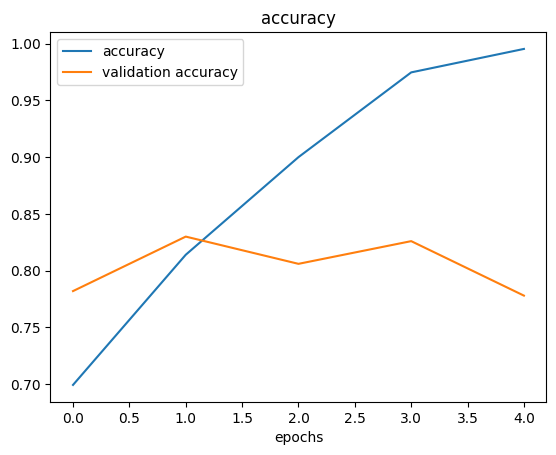

In [17]:
plot_loss_curve(history_1)

### Our model seemed to be over fitted. Let's remove overfitting


In [18]:
#create the model
model_2 = Sequential([
    Conv2D(
        filters=10,
        kernel_size=3,
        input_shape=(244,244,3),
        activation="relu"
    ),
    Conv2D(
        filters=10,
        kernel_size=3,
        input_shape=(244,244,3),
        activation="relu"
    ),
    MaxPool2D(pool_size=2),
    Conv2D(
        filters=10,
        kernel_size=3,
        input_shape=(244,244,3),
        activation="relu"
    ),
    Conv2D(
        filters=10,
        kernel_size=3,
        input_shape=(244,244,3),
        activation="relu"
    ),
    Conv2D(
        filters=10,
        kernel_size=3,
        input_shape=(244,244,3),
        activation="relu"
    ),
    Flatten(),
    Dense(1,activation="sigmoid")
])

#compile the model
model_2.compile(
    loss=BinaryCrossentropy(),
    optimizer=Adam(),
    metrics=['accuracy']
)

#fit the model
history_2=model_2.fit(
    train_data,
    epochs=10,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/10
47/47 [==============================] - 10s 149ms/step - loss: 0.7270 - accuracy: 0.6160 - val_loss: 0.5504 - val_accuracy: 0.7180
Epoch 2/10
47/47 [==============================] - 6s 137ms/step - loss: 0.4881 - accuracy: 0.7713 - val_loss: 0.5408 - val_accuracy: 0.6940
Epoch 3/10
47/47 [==============================] - 6s 122ms/step - loss: 0.4253 - accuracy: 0.8060 - val_loss: 0.4103 - val_accuracy: 0.8100
Epoch 4/10
47/47 [==============================] - 6s 138ms/step - loss: 0.4173 - accuracy: 0.8207 - val_loss: 0.4746 - val_accuracy: 0.7780
Epoch 5/10
47/47 [==============================] - 7s 138ms/step - loss: 0.3864 - accuracy: 0.8360 - val_loss: 0.3680 - val_accuracy: 0.8360
Epoch 6/10
47/47 [==============================] - 6s 122ms/step - loss: 0.2987 - accuracy: 0.8793 - val_loss: 0.3756 - val_accuracy: 0.8300
Epoch 7/10
47/47 [==============================] - 8s 171ms/step - loss: 0.2040 - accuracy: 0.9307 - val_loss: 0.3827 - val_accuracy: 0.8420
Epoch

<Axes: >

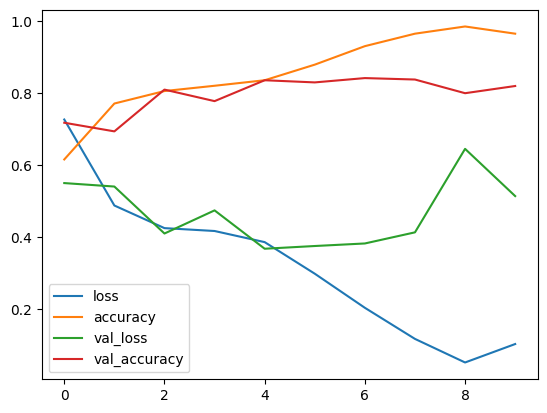

In [19]:
pd.DataFrame(history_2.history).plot()

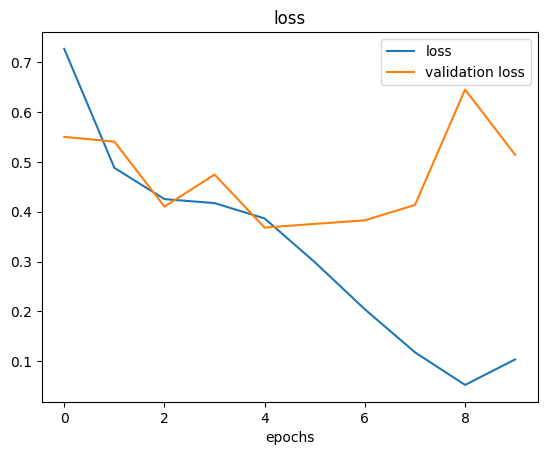

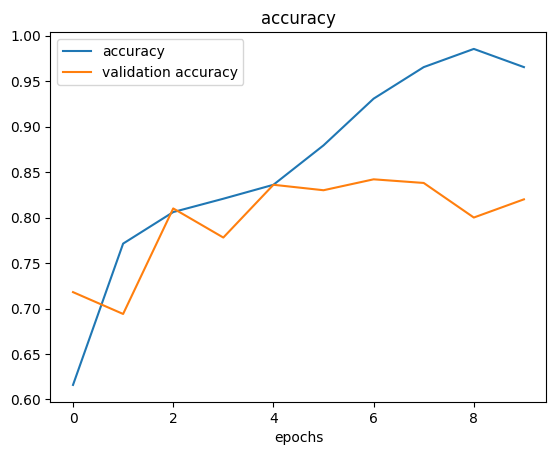

In [20]:
plot_loss_curve(history_2)

In [21]:
train_data_gen = ImageDataGenerator(
    rescale=1/255,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rotation_range=0.2,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True

)

test_data_gen = ImageDataGenerator(
    rescale=1/255,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rotation_range=0.2,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True
)

train_data=train_data_gen.flow_from_directory(
    directory=train_dir,
    target_size=(244,244),
    class_mode="binary",
    seed=42,
    batch_size=32
)

test_data = test_data_gen.flow_from_directory(
    directory=test_dir,
    target_size=(244,244),
    class_mode="binary",
    seed=42,
    batch_size=32
)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [25]:
import tensorflow as tf
#set random seed
tf.random.set_seed(42)

#create the model
model_3 = Sequential([
    Conv2D(
        filters=10,
        kernel_size=3,
        input_shape=(244,244,3),
        activation="relu"
    ),
    MaxPool2D(pool_size=2),
    Conv2D(
        filters=10,
        kernel_size=3,
        input_shape=(244,244,3),
        activation="relu"
    ),
    MaxPool2D(pool_size=2),
    Conv2D(
        filters=10,
        kernel_size=3,
        input_shape=(244,244,3),
        activation="relu"
    ),
    MaxPool2D(pool_size=2),
    Conv2D(
        filters=10,
        kernel_size=3,
        input_shape=(244,244,3),
        activation="relu"
    ),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(1,activation="sigmoid")
])

#compile the model
model_3.compile(
    loss=BinaryCrossentropy(),
    optimizer=Adam(),
    metrics=['accuracy']
)

#fit the model
history_3 = model_3.fit(
    train_data,
    epochs=10,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/10
47/47 [==============================] - 35s 695ms/step - loss: 0.6713 - accuracy: 0.5560 - val_loss: 0.7046 - val_accuracy: 0.5580
Epoch 2/10
47/47 [==============================] - 30s 632ms/step - loss: 0.6281 - accuracy: 0.6520 - val_loss: 0.5793 - val_accuracy: 0.6960
Epoch 3/10
47/47 [==============================] - 30s 640ms/step - loss: 0.5802 - accuracy: 0.7087 - val_loss: 0.5240 - val_accuracy: 0.7360
Epoch 4/10
47/47 [==============================] - 29s 613ms/step - loss: 0.4975 - accuracy: 0.7613 - val_loss: 0.4080 - val_accuracy: 0.8240
Epoch 5/10
47/47 [==============================] - 29s 625ms/step - loss: 0.4639 - accuracy: 0.7760 - val_loss: 0.3930 - val_accuracy: 0.8180
Epoch 6/10
47/47 [==============================] - 30s 628ms/step - loss: 0.4669 - accuracy: 0.7813 - val_loss: 0.3507 - val_accuracy: 0.8520
Epoch 7/10
47/47 [==============================] - 29s 626ms/step - loss: 0.4357 - accuracy: 0.7940 - val_loss: 0.4166 - val_accuracy: 0.8120

<Axes: >

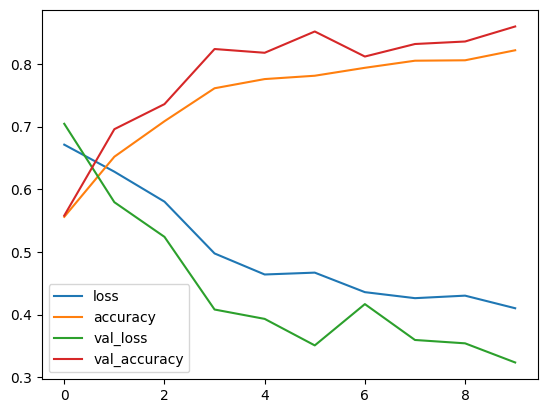

In [26]:
pd.DataFrame(history_3.history).plot()

--2024-02-04 15:29:55--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.02s   

2024-02-04 15:29:56 (85.0 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



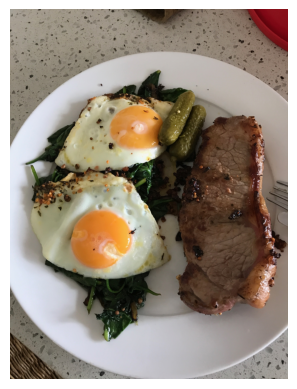

In [27]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [28]:
steak.shape

(4032, 3024, 3)

In [33]:
model_3.predict(tf.expand_dims(steak,axis=0))

1/1 [==============================] - 0s 60ms/step


array([[0.8484571]], dtype=float32)

In [29]:
def load_and_prep_image(file_name,image_shape):
  #read the image file
  img = tf.io.read_file(file_name)
  #convert the image into tensor
  tensor_img = tf.image.decode_image(img)
  #resize the image
  img_resize = tf.image.resize(tensor_img,size=image_shape)
  #converting image tensor to 1 and 0
  return img_resize/255

In [30]:
steak=load_and_prep_image("03-steak.jpeg",image_shape=[244,244])
steak

<tf.Tensor: shape=(244, 244, 3), dtype=float32, numpy=
array([[[0.62829334, 0.61260706, 0.5694698 ],
        [0.6673293 , 0.6408105 , 0.5997305 ],
        [0.6288645 , 0.61317825, 0.56611943],
        ...,
        [0.5279978 , 0.05740957, 0.09270369],
        [0.5383952 , 0.07957173, 0.11094428],
        [0.5240058 , 0.07302541, 0.1004764 ]],

       [[0.6354672 , 0.6197809 , 0.57664365],
        [0.6364191 , 0.62073284, 0.573674  ],
        [0.6332691 , 0.6175828 , 0.570524  ],
        ...,
        [0.5269163 , 0.05632809, 0.09162221],
        [0.5549276 , 0.08433936, 0.11963347],
        [0.52707314, 0.06824964, 0.09962219]],

       [[0.6360334 , 0.62034714, 0.5732883 ],
        [0.6626118 , 0.6390824 , 0.59202355],
        [0.65419877, 0.6377974 , 0.5907386 ],
        ...,
        [0.5446726 , 0.07408439, 0.111761  ],
        [0.53613055, 0.07730698, 0.10867953],
        [0.5340747 , 0.06348649, 0.0987806 ]],

       ...,

       [[0.56892025, 0.4865673 , 0.37522048],
        [0.06

In [34]:
def pred_and_plot(model,file_name,class_names):

  #import image
  img = load_and_prep_image(file_name,[244,244])
  #make a prediction
  pred = model.predict(tf.expand_dims(img,axis=0))
  #get the predicted class
  pred_class = class_names[int(tf.round(pred))]
  print(int(tf.round(pred)))
  plt.imshow(img)
  plt.title(f"predicition is {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 19ms/step
1


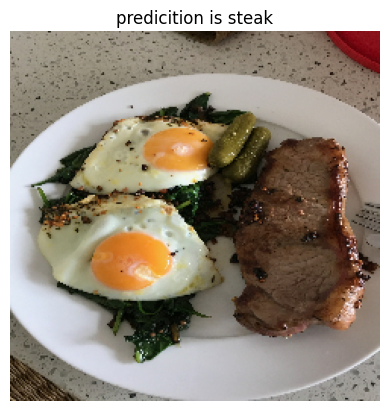

In [40]:
pred_and_plot(model_3,"03-steak.jpeg",class_names)